## *Importando bibliotecas*

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# `Aula 1: Conhecendo o Matplotlib`

### 1.1 Conhecendo os Dados

In [20]:
df = pd.read_csv("arquivos/imigrantes_canada.csv", sep=",")
df

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnã,Ásia,Sudeste Asiático,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Saara Ocidental,África,Norte da África,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Iémen,Ásia,Ásia Ocidental,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
193,Zâmbia,África,África Oriental,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

##### Minha análise

<Axes: xlabel='Ano', ylabel='No_Imigrantes'>

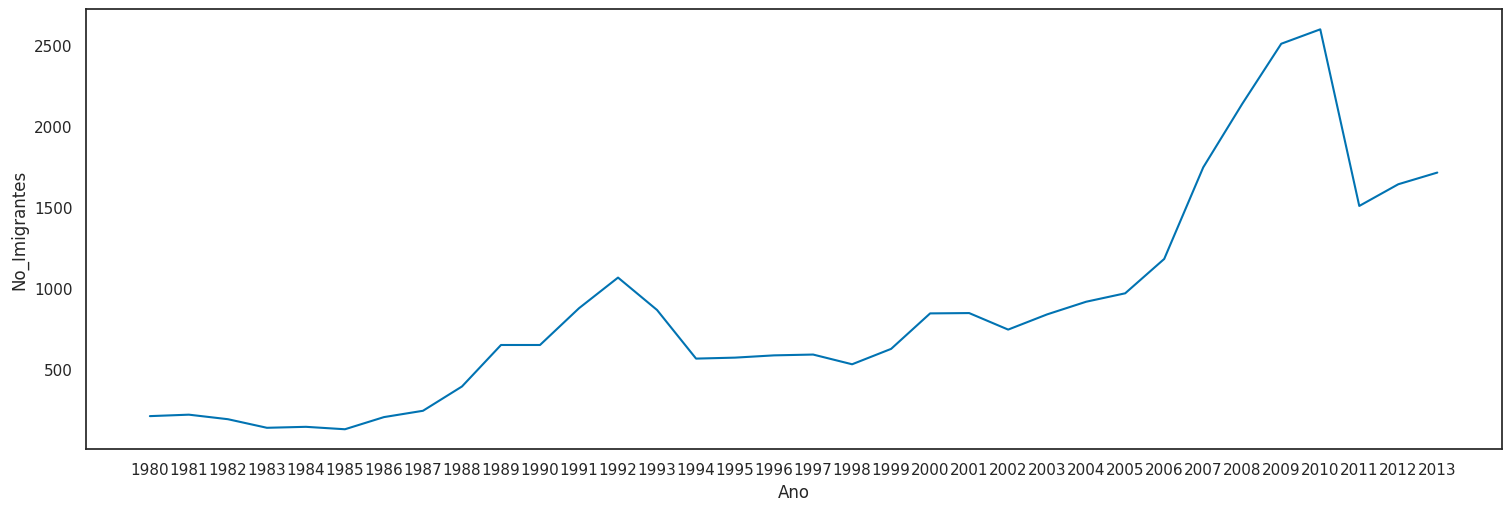

In [22]:
# Analisando tendências de imigração do Brasil

# filtrando apenas o Brasil
imigracao_br = df.query("País == 'Brasil'")

# filtrando apenas as colunas e linhas desejadas. Também estou resentando o index aqui
imigracao_br = imigracao_br.iloc[0, 3:37].reset_index()

# Dando nome às colunas
imigracao_br.columns = ["Ano", "No_Imigrantes"]

# plotando gráfico
plt.figure(figsize=(15, 5), constrained_layout=True)
sns.lineplot(data=imigracao_br, x="Ano", y="No_Imigrantes")


##### Análise do curso

In [23]:
# Definindo a coluna "País" como index do DataFrame
df_1 = df.set_index("País")

# Criando uma lista com as respectivas colunas dos anos que aparecem no DataFrame
anos = list(map(str, range(1980, 2014)))

# Criando uma Series que contenha as informações das colunas com anos do DataFrame
brasil = df_1.loc["Brasil", anos].to_frame().reset_index()
brasil.columns = ["ano", "imigrantes"]
brasil

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145
5,1985,130
6,1986,205
7,1987,244
8,1988,394
9,1989,650


### 1.2 Criando o Primeiro Gráfico com Matplotlib

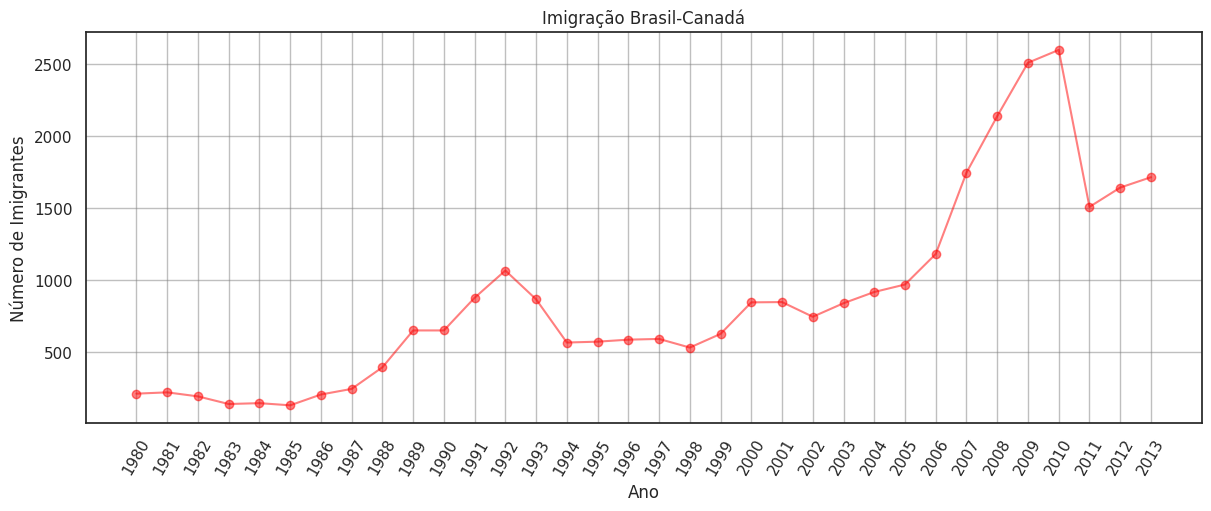

In [24]:
# Configura o tamanho da figura e ajusta automaticamente o layout
plt.figure(
    figsize=(12, 5),  # Define o tamanho da figura (largura x altura)
    constrained_layout=True,  # Ajusta automaticamente os elementos do layout para evitar sobreposição
)

# Títulos do gráfico
plt.title("Imigração Brasil-Canadá")
plt.xlabel("Ano")
plt.ylabel("Número de Imigrantes")

# Plota os dados de imigração ao longo dos anos
plt.plot(
    brasil["ano"],  # Dados para o eixo x (anos)
    brasil["imigrantes"],  # Dados para o eixo y (número de imigrantes)
    color="red",  # Define a cor da linha como vermelha
    linewidth=1.5,  # Define a espessura da linha
    alpha=0.5,  # Define a transparência da linha (50% opaco)
    linestyle="-",  # Define o estilo da linha como sólida
    marker="o",  # Define o marcador de pontos como círculos
)

# Configura os rótulos do eixo x
plt.xticks(
    ticks=brasil["ano"],  # Define as posições dos rótulos no eixo x
    rotation=60,  # Rotaciona os rótulos do eixo x em 30 graus para melhor legibilidade
)

# Adiciona uma grade ao gráfico para facilitar a visualização dos dados
plt.grid(color="grey", alpha=0.5)

# Exibe o gráfico na tela
plt.show()


### 1.3 Imigrantes Brasil x Argentina para o Canadá

##### Minha solução

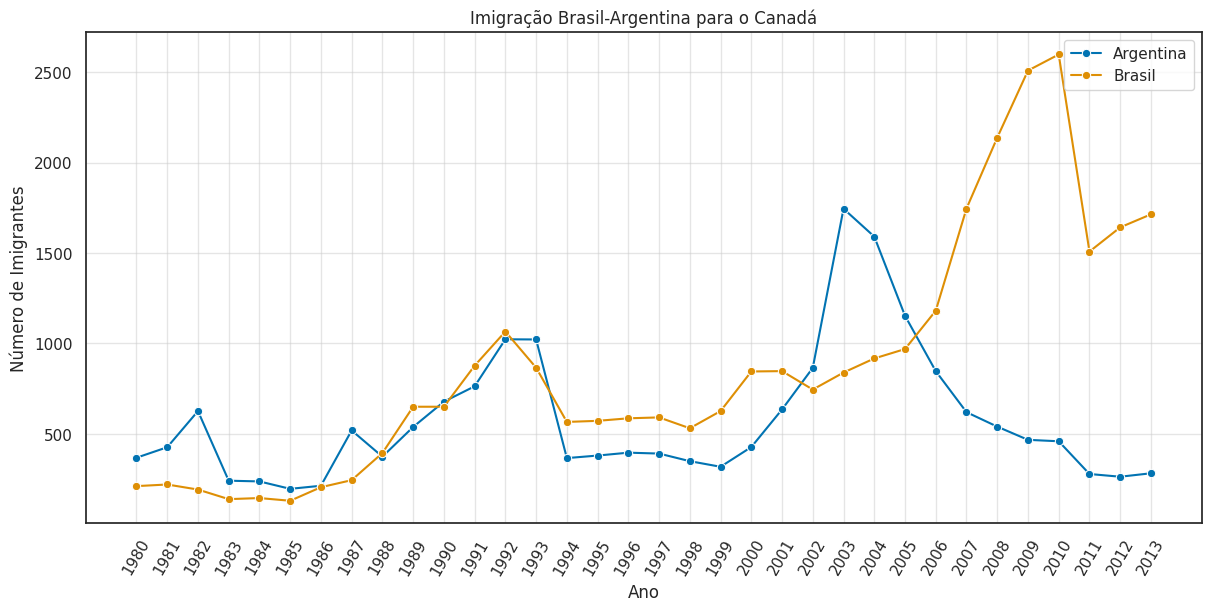

In [25]:
imigracao_br_ar = df.query("País == 'Brasil' or País == 'Argentina'")

imigracao_br_ar = imigracao_br_ar.iloc[0:2, 3:37].T.reset_index()

imigracao_br_ar.columns = ["Ano", "Argentina", "Brasil"]

plt.figure(figsize=(12, 6), constrained_layout=True)

plt.title("Imigração Brasil-Argentina para o Canadá")
plt.xlabel("Ano")
plt.ylabel("Número de Imigrantes")

plt.grid(alpha=0.5)

sns.lineplot(imigracao_br_ar, x="Ano", y="Argentina", label="Argentina", marker="o")
sns.lineplot(imigracao_br_ar, x="Ano", y="Brasil", label="Brasil", marker="o")

plt.xticks(ticks=imigracao_br_ar["Ano"], rotation=60)

plt.show()


##### Resolução do curso

/tmp/ipykernel_62756/721912788.py:35: UserWarning:

The figure layout has changed to tight



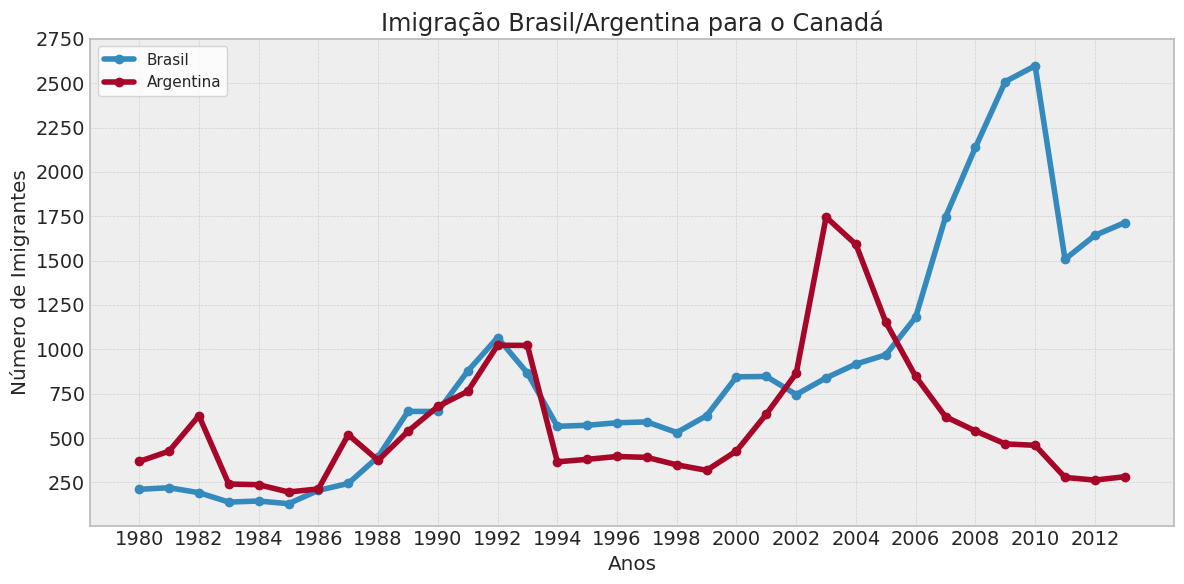

In [26]:
anos = list(map(str, range(1980, 2014)))

# Extraindo apenas as informações referentes ao Brasil e Argentina
df_comparacao = df_1.loc[["Brasil", "Argentina"], anos]
df_comparacao = df_comparacao.T.reset_index()
df_comparacao.columns = ["anos", "brasil", "argentina"]

with plt.style.context("bmh"):
    plt.figure(figsize=(12, 6), constrained_layout=True)

    plt.title("Imigração Brasil/Argentina para o Canadá")
    plt.xlabel("Anos")
    plt.ylabel("Número de Imigrantes")

    plt.plot(
        df_comparacao["anos"].astype(int),
        df_comparacao["brasil"],
        label="Brasil",
        marker="o",
        lw=4,
    )
    plt.plot(
        df_comparacao["anos"].astype(int),
        df_comparacao["argentina"],
        label="Argentina",
        marker="o",
        lw=4,
    )

    plt.xticks(ticks=list(range(1980, 2014, 2)), fontsize=14)
    plt.yticks(ticks=list(range(250, 3000, 250)), fontsize=14)

plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


# `Aula 2: Criando figuras com Matplotlib`

### 2.1 Criando uma figura

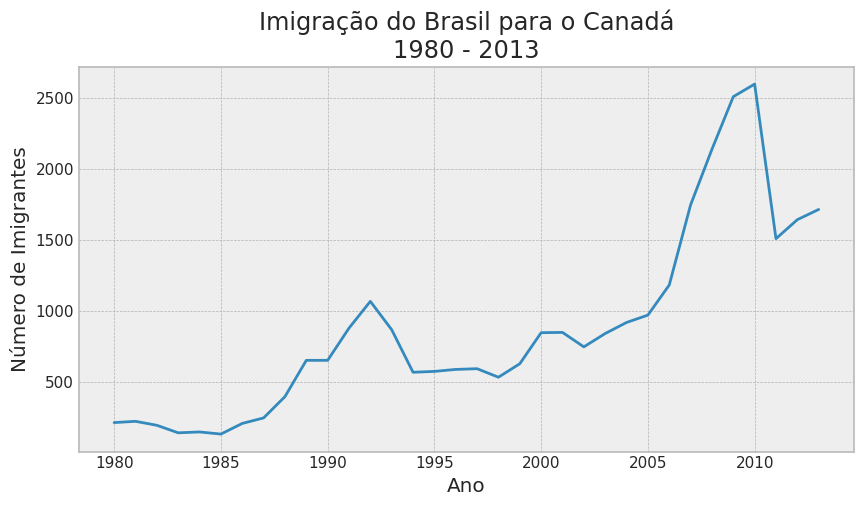

In [27]:
from matplotlib import ticker


IPython_default = plt.rcParams.copy()

plt.style.use("bmh")

fig, axs = plt.subplots(figsize=(10, 5))

axs.plot(imigracao_br["Ano"], imigracao_br["No_Imigrantes"])

axs.set_title("Imigração do Brasil para o Canadá\n1980 - 2013")

axs.xaxis.set_major_locator(ticker.MultipleLocator(5))
axs.set_xlabel("Ano")
axs.set_ylabel("Número de Imigrantes")

plt.show()
plt.rcParams.update(IPython_default)


### 2.2 Criando subplots em duas direções

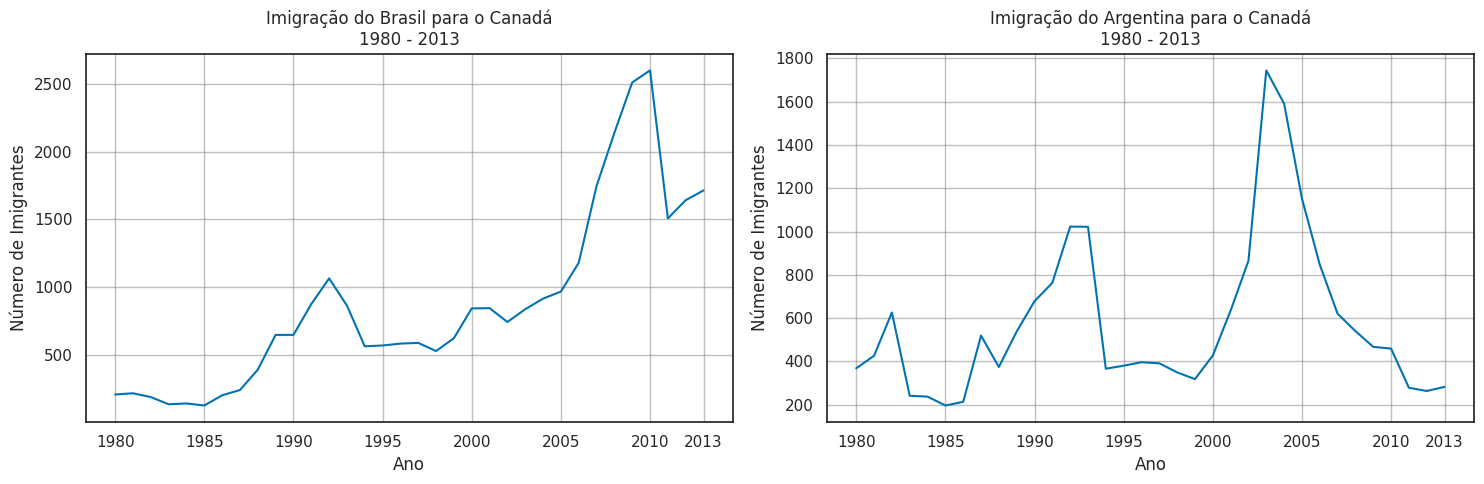

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

anos = [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2013]

axs[0].plot(imigracao_br_ar["Ano"].astype(int), imigracao_br_ar["Brasil"])
axs[0].set_xticks(anos)
axs[0].set_title("Imigração do Brasil para o Canadá\n1980 - 2013")
axs[0].set_xlabel("Ano")
axs[0].set_ylabel("Número de Imigrantes")
axs[0].grid(color="grey", alpha=0.5)

axs[1].plot(imigracao_br_ar["Ano"].astype(int), imigracao_br_ar["Argentina"])
axs[1].set_xticks(anos)
axs[1].set_title("Imigração do Argentina para o Canadá\n1980 - 2013")
axs[1].set_xlabel("Ano")
axs[1].set_ylabel("Número de Imigrantes")
axs[1].grid(color="grey", alpha=0.5)

plt.tight_layout()

plt.show()

### 2.3 Criando Subplots em Quatro direções

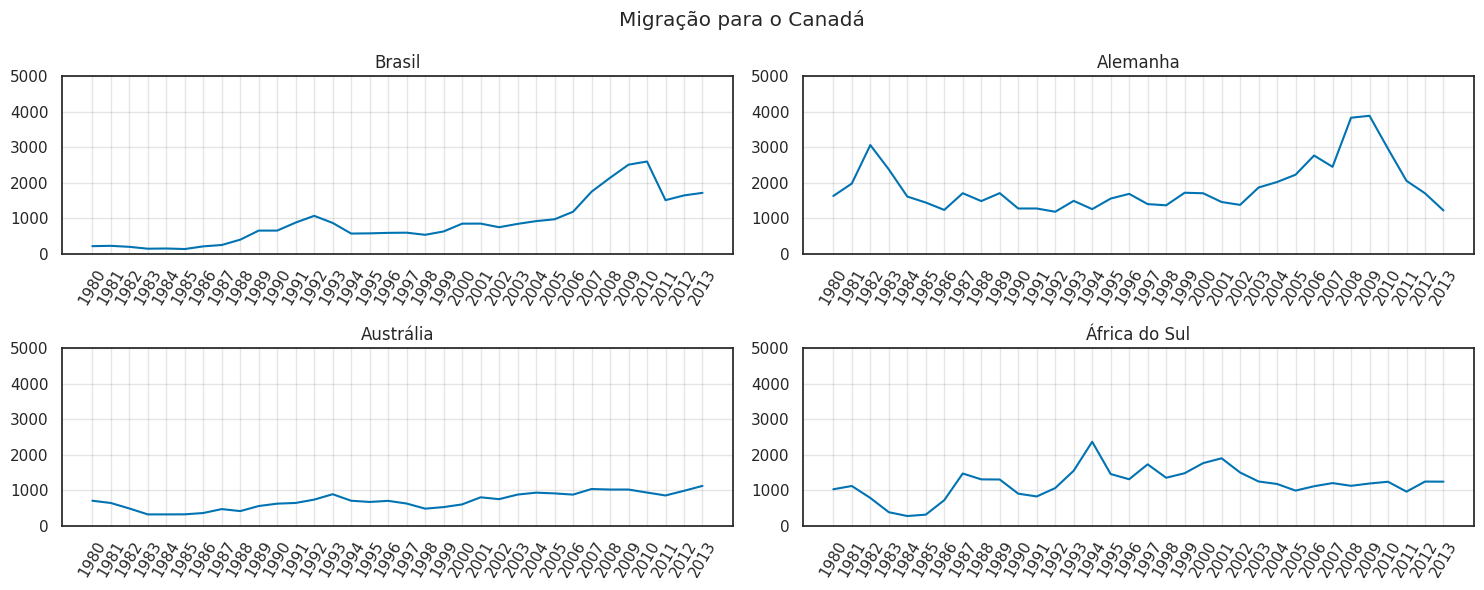

In [29]:
anos = list(map(str, range(1980, 2014)))

fig, axs = plt.subplots(2, 2, figsize=(15, 6))
fig.suptitle("Migração para o Canadá")

axs[0, 0].plot(df_1.loc["Brasil", anos])
axs[0, 0].set_title("Brasil")

axs[0, 1].plot(df_1.loc["Alemanha", anos])
axs[0, 1].set_title("Alemanha")

axs[1, 0].plot(df_1.loc["Austrália", anos])
axs[1, 0].set_title("Austrália")

axs[1, 1].plot(df_1.loc["África do Sul", anos])
axs[1, 1].set_title("África do Sul")

for ax in axs.flat:
    ax.set_xticks(anos)
    ax.set_xticklabels(anos, rotation=60)
    ax.grid(color="grey", alpha=0.2)

for ax in axs.flat:
    ax.set_ylim(0, 5000)

fig.tight_layout()
plt.show()


### Desafio: Visualizando Dados de Vendas de Diferentes Lojas

Você deve criar quatro subplots dispostos em duas linhas e duas colunas, onde cada subplot representa uma loja diferente. Nesse desafio, cada subplot deve apresentar um gráfico de linhas que mostre a variação do número de vendas ao longo dos meses do ano.

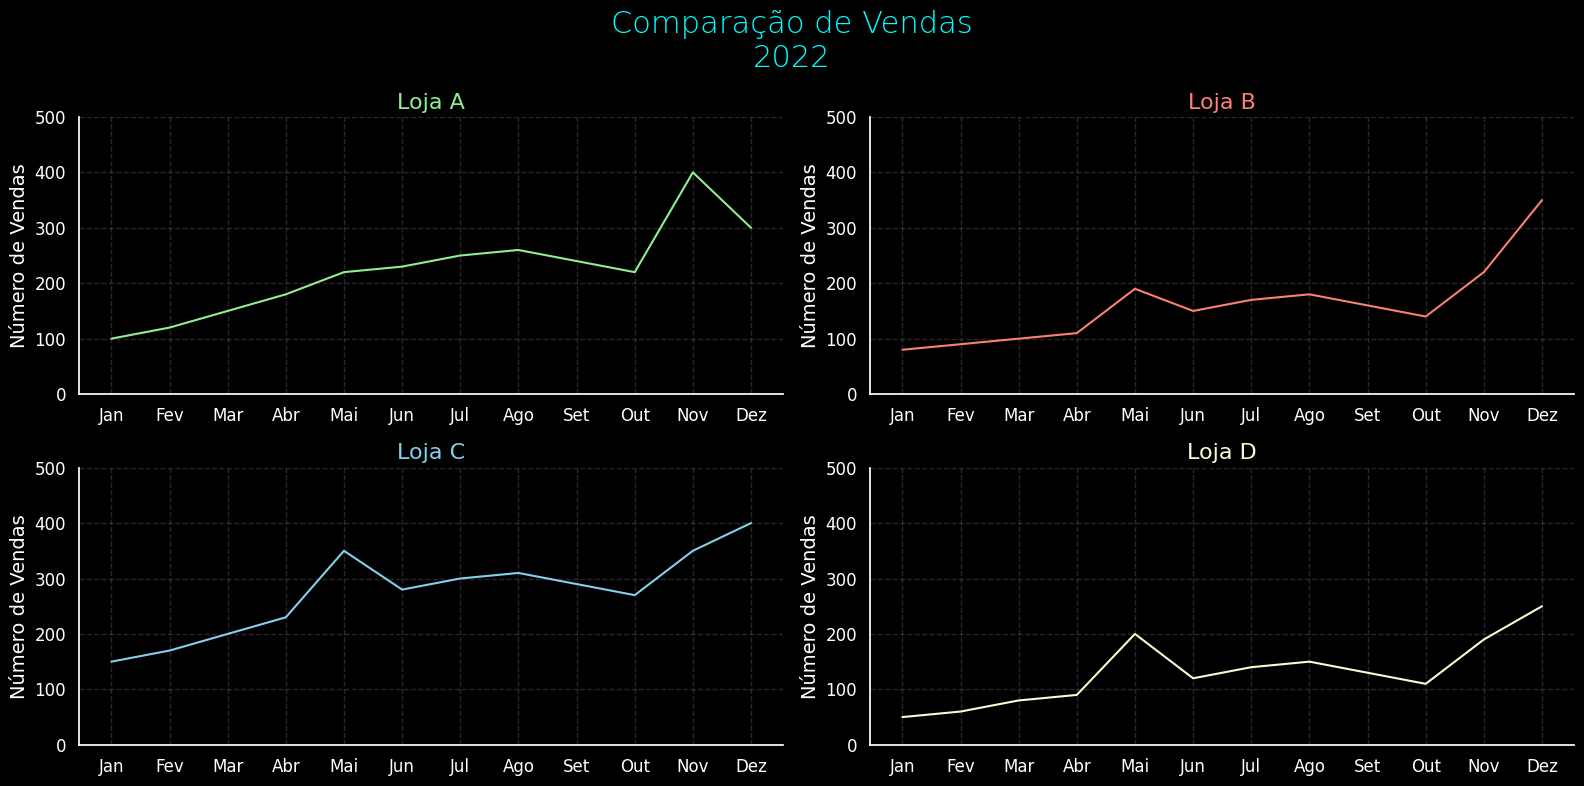

In [30]:
lojas = ["A", "B", "C", "D"]

vendas_2022 = {
    "Jan": [100, 80, 150, 50],
    "Fev": [120, 90, 170, 60],
    "Mar": [150, 100, 200, 80],
    "Abr": [180, 110, 230, 90],
    "Mai": [220, 190, 350, 200],
    "Jun": [230, 150, 280, 120],
    "Jul": [250, 170, 300, 140],
    "Ago": [260, 180, 310, 150],
    "Set": [240, 160, 290, 130],
    "Out": [220, 140, 270, 110],
    "Nov": [400, 220, 350, 190],
    "Dez": [300, 350, 400, 250],
}

data = pd.DataFrame(vendas_2022)
data = data.T
data = data.reset_index()
data.columns = ["Meses", "Loja A", "Loja B", "Loja C", "Loja D"]

with plt.style.context("dark_background"):
    fig, axs = plt.subplots(2, 2, figsize=(16, 8))

    fig.suptitle("Comparação de Vendas\n2022", fontsize=22, color="aqua", fontweight=3)

    axs[0, 0].plot(data["Meses"], data["Loja A"], color="lightgreen")
    axs[0, 0].set_title("Loja A", fontsize=16, color="lightgreen")

    axs[0, 1].plot(data["Meses"], data["Loja B"], color="salmon")
    axs[0, 1].set_title("Loja B", fontsize=16, color="salmon")

    axs[1, 0].plot(data["Meses"], data["Loja C"], color="skyblue")
    axs[1, 0].set_title("Loja C", fontsize=16, color="skyblue")

    axs[1, 1].plot(data["Meses"], data["Loja D"], color="lightgoldenrodyellow")
    axs[1, 1].set_title("Loja D", fontsize=16, color="lightgoldenrodyellow")

for ax in axs.flat:
    ax.grid(color="grey", alpha=0.3, ls="--")
    ax.set_ylim(0, 500)
    ax.set_ylabel("Número de Vendas", fontsize=14)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)


plt.tight_layout()  # Ajuste do layout para não sobrepor o suptitle
plt.show()


# `Aula 3: customizando com Matplotlib`

### 3.1 Personalizando Visualizações com Matplotlib

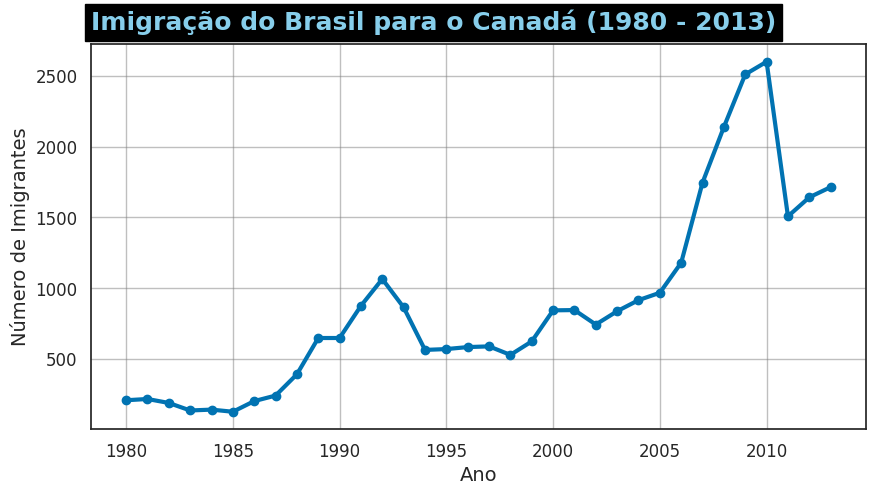

In [31]:
anos = list(range(1980, 2014, 5))

fig, axs = plt.subplots(figsize=(10, 5))

axs.plot(
    imigracao_br["Ano"].astype(int), imigracao_br["No_Imigrantes"], marker="o", lw=3
)

axs.set_title(
    "Imigração do Brasil para o Canadá (1980 - 2013)",
    fontdict={
        "fontsize": 18,
        "fontweight": "bold",
        "color": "skyblue",
        "backgroundcolor": "black",
    },
    loc="left",
    pad=10,
)
axs.set_xlabel("Ano", fontsize=14)
axs.set_ylabel("Número de Imigrantes", fontsize=14)
axs.set_xticks(anos)

axs.xaxis.set_tick_params(labelsize=12)
axs.yaxis.set_tick_params(labelsize=12)
axs.grid(color="grey", alpha=0.5)

plt.show()


### 3.2 Alterando Cores

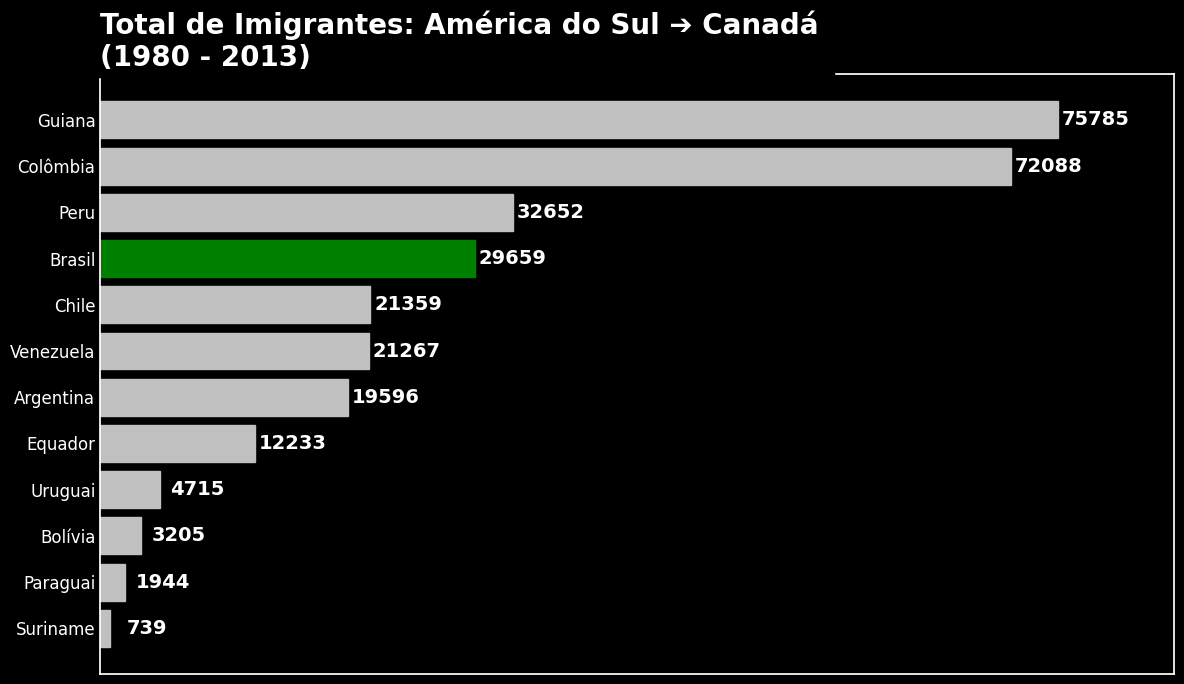

In [32]:
# Filtra e organiza os dados da América do Sul
df_america_do_sul = df_1.query("Região == 'América do Sul'")
df_america_do_sul = df_america_do_sul.sort_values("Total", ascending=True).reset_index()

# Configuração do estilo do gráfico
with plt.style.context("dark_background"):
    # Criação da figura e dos eixos
    fig, ax = plt.subplots(figsize=(12, 7))

    # Configuração do título do gráfico
    ax.set_title(
        "Total de Imigrantes: América do Sul ➔ Canadá \n(1980 - 2013)",
        fontsize=20,
        loc="left",
        backgroundcolor="black",
        fontweight="bold",
        color="white",
    )

    # Criação do gráfico de barras horizontais
    bars = ax.barh(df_america_do_sul["País"], df_america_do_sul["Total"])

    # Itera sobre as barras para definir a cor e adicionar os rótulos
    for bar, país in zip(bars, df_america_do_sul["País"]):
        # Define a cor da barra
        if país == "Brasil":
            bar.set_color("green")
        else:
            bar.set_color("silver")

        # Obtém as posições e tamanhos das barras
        yval = bar.get_y()
        wval = bar.get_width()
        hval = bar.get_height()

        # Adiciona rótulos de valor às barras
        ax.text(
            wval + 3000,
            yval + hval / 2,
            str(wval),
            ha="center",
            va="center",
            fontsize=14,
            color="white",
            fontweight="bold",
        )

    # Define o limite do eixo x
    ax.set_xlim(0, 85000)

    # Configurações dos rótulos e tamanhos das fontes dos eixos
    ax.set_xlabel("Número Total de Imigrantes por País", fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.get_xaxis().set_visible(False)
    ax.tick_params(axis="both", which="both", length=0)

# Ajusta o layout e exibe o gráfico
plt.tight_layout()

# salvando o gráfico
fig.savefig(
    "imigrantes_america_sul",
    dpi=300,
    format="png",
    bbox_inches="tight",
    transparent=False,
)

plt.show()


# `Aula 4: conhecendo a biblioteca Seaborn`

### 4.1 Criando o Primeiro Gráfico com Seaborn

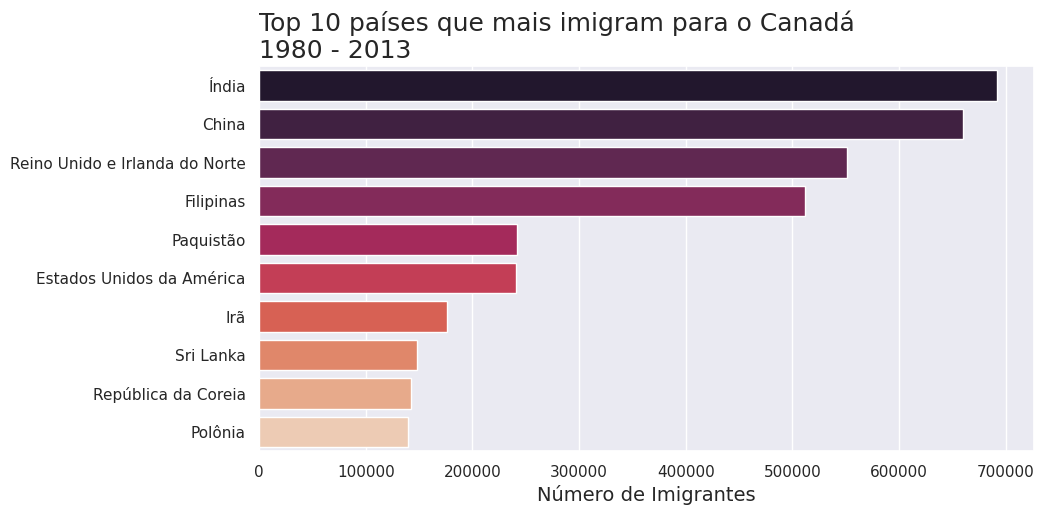

In [33]:
sns.set_theme(style="darkgrid", palette="colorblind", context="notebook")

top_10 = df.sort_values("Total", ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(data=top_10, x="Total", y="País", hue="País", palette="rocket", orient="h")
ax.set_title("Top 10 países que mais imigram para o Canadá\n1980 - 2013", loc="left", fontsize=18)
ax.set_xlabel("Número de Imigrantes", fontsize=14)
ax.set_ylabel("")

plt.show()

### 4.2 Personalizando Visualizações com Seaborn

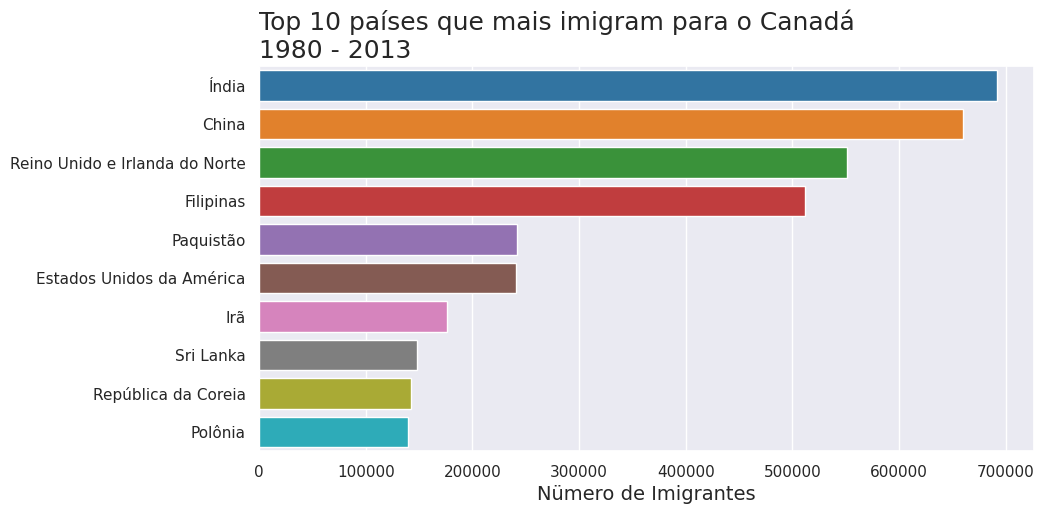

In [34]:
def gerar_grafico_paleta(palette: str):
    fig, ax = plt.subplots(figsize=(10, 5))

    ax = sns.barplot(data=top_10, y="País", x="Total", hue="País", palette=palette)
    ax.set_title("Top 10 países que mais imigram para o Canadá\n1980 - 2013", loc="left", fontsize=18)
    ax.set_xlabel("Nümero de Imigrantes", fontsize=14)
    ax.set_ylabel("")

    plt.show()

gerar_grafico_paleta("tab10")

### Desafio: criando um gráfico de linhas com a biblioteca Seaborn

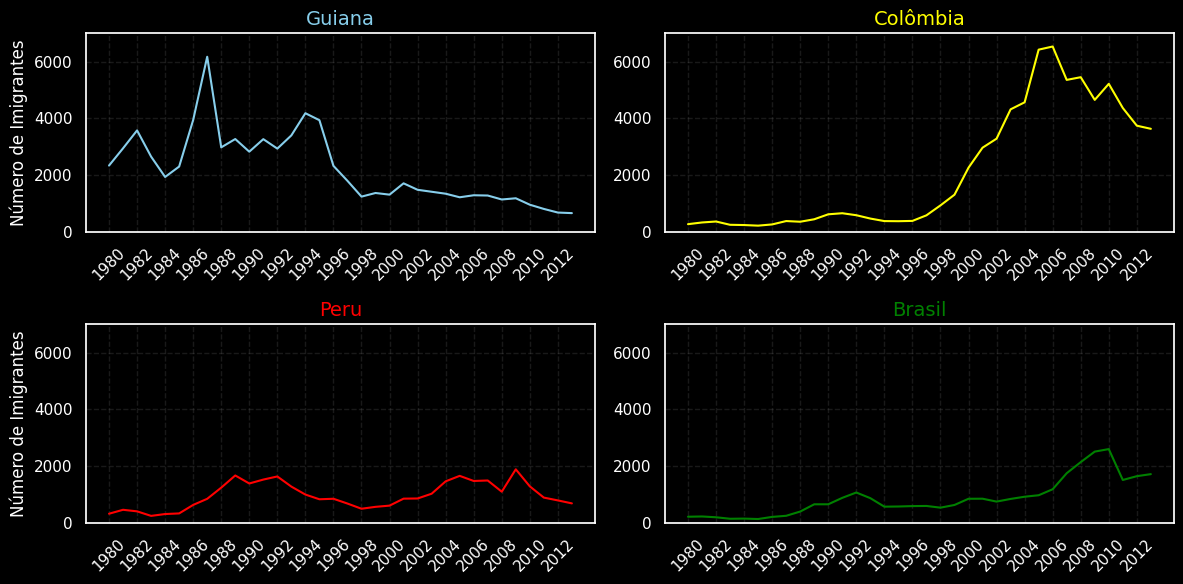

In [35]:
df_top4 = df_america_do_sul.sort_values("Total", ascending=False).head(4)
df_top4.drop(columns=["Continente", "Região", "Total"], inplace=True)
df_top4.set_index("País", inplace=True)
df_top4 = df_top4.T.reset_index()
df_top4.columns = ["Ano", "Guiana", "Colômbia", "Peru", "Brasil"]

with plt.style.context("dark_background"):
    fig, axs = plt.subplots(2, 2, figsize=(12, 6))

    df_top4["Ano"] = df_top4["Ano"].astype(int)

    sns.lineplot(data=df_top4, x="Ano", y="Guiana", ax=axs[0, 0], color="skyblue")
    axs[0, 0].set_title("Guiana", fontsize=14, color="skyblue")
    axs[0, 0].set_ylabel("Número de Imigrantes")
    axs[0, 0].set_xlabel("")

    sns.lineplot(data=df_top4, x="Ano", y="Colômbia", ax=axs[0, 1], color="yellow")
    axs[0, 1].set_title("Colômbia", fontsize=14, color="yellow")
    axs[0, 1].set_ylabel("")
    axs[0, 1].set_xlabel("")

    sns.lineplot(data=df_top4, x="Ano", y="Peru", ax=axs[1, 0], color="red")
    axs[1, 0].set_title("Peru", fontsize=14, color="red")
    axs[1, 0].set_ylabel("Número de Imigrantes")
    axs[1, 0].set_xlabel("")

    sns.lineplot(data=df_top4, x="Ano", y="Brasil", ax=axs[1, 1], color="green")
    axs[1, 1].set_title("Brasil", fontsize=14, color="green")
    axs[1, 1].set_ylabel("")
    axs[1, 1].set_xlabel("")

anos = list(range(1980, 2014, 2))


for ax in axs.flat:
    ax.set_ylim(0, 7000)
    ax.set_xticks(anos)
    ax.set_xticklabels(anos, rotation=45)
    ax.grid(alpha=0.2, color="grey", linestyle="--")
    
plt.tight_layout()
plt.show()


# `Aula 5: gráficos interativos com Plotly`

### 5.1 Criando o Primeiro Gráfico Interativo

In [39]:
sns.set_style("white")

fig = px.line(imigracao_br, x="Ano", y="No_Imigrantes")

fig.update_layout(width=1000, 
                  height=500, 
                  xaxis=dict(title="Ano",
                             tickangle=-45),
                  yaxis=dict(title="Número de Imigrantes")
                 )

fig.show()

